In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
df = pd.read_csv("customer_churn.csv")
df.head()

,Names,Age,Total_Purchase,Account_Manager,Years,Num_Sites,Onboard_date,Location,Company,Churn
0,Cameron Williams,42.0,11066.80,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1
1,Kevin Mueller,41.0,11916.22,0,6.50,11.0,2013-08-13 00:38:46,"6157 Frank Gardens Suite 019 Carloshaven, RI 1...",Wilson PLC,1
2,Eric Lozano,38.0,12884.75,0,6.67,12.0,2016-06-29 06:20:07,"1331 Keith Court Alyssahaven, DE 90114","Miller, Johnson and Wallace",1
3,Phillip White,42.0,8010.76,0,6.71,10.0,2014-04-22 12:43:12,"13120 Daniel Mount Angelabury, WY 30645-4695",Smith Inc,1
4,Cynthia Norton,37.0,9191.58,0,5.56,9.0,2016-01-19 15:31:15,"765 Tricia Row Karenshire, MH 71730",Love-Jones,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Names            900 non-null    object 
 1   Age              900 non-null    float64
 2   Total_Purchase   900 non-null    float64
 3   Account_Manager  900 non-null    int64  
 4   Years            900 non-null    float64
 5   Num_Sites        900 non-null    float64
 6   Onboard_date     900 non-null    object 
 7   Location         900 non-null    object 
 8   Company          900 non-null    object 
 9   Churn            900 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 70.4+ KB


In [15]:
df['Churn'].value_counts(normalize=True)

Churn
0    0.833333
1    0.166667
Name: proportion, dtype: float64

In [17]:
df.isnull().sum()

Names              0
Age                0
Total_Purchase     0
Account_Manager    0
Years              0
Num_Sites          0
Onboard_date       0
Location           0
Company            0
Churn              0
dtype: int64

In [18]:
if 'Onboard_date' in df.columns:
    df['Onboard_date'] = pd.to_datetime(df['Onboard_date'])
    df['Onboard_Year'] = df['Onboard_date'].dt.year
    df['Onboard_Month'] = df['Onboard_date'].dt.month
    print("\nProcessed 'Onboard_date' into Year and Month columns.")

cols_to_drop = ['Names', 'Location', 'Company', 'Onboard_date']
plot_df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])


Processed 'Onboard_date' into Year and Month columns.


C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\3218474708.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette='coolwarm')


Text(0, 0.5, 'Count')

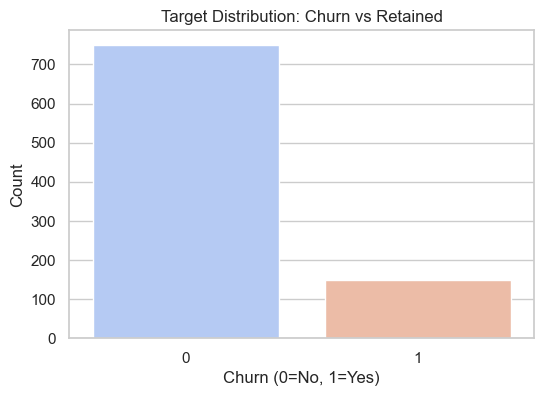

In [20]:
sns.set(style="whitegrid", palette="muted")

plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df, palette='coolwarm')
plt.title('Target Distribution: Churn vs Retained')
plt.xlabel('Churn (0=No, 1=Yes)')
plt.ylabel('Count')

In [21]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

Churn
0    83.333333
1    16.666667
Name: proportion, dtype: float64

C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\2605273273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, ax=axes[row, col_pos], palette='coolwarm')
C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\2605273273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, ax=axes[row, col_pos], palette='coolwarm')
C:\Users\rdine\AppData\Local\Temp\ipykernel_18396\2605273273.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=col, data=df, ax=axes[row, col_pos], palette='coolwarm'

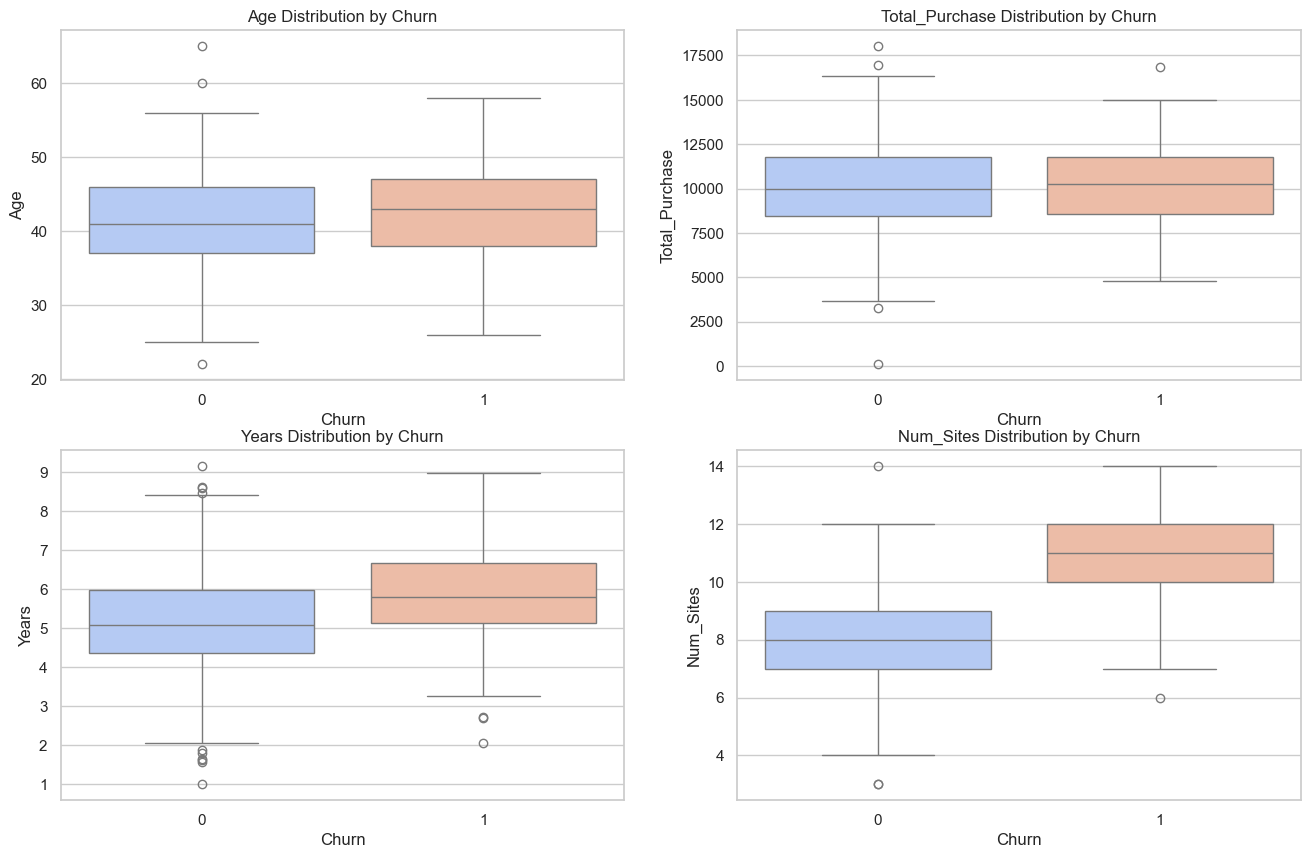

In [22]:
numerical_features = ['Age', 'Total_Purchase', 'Years', 'Num_Sites']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

for i, col in enumerate(numerical_features):
    if col in df.columns:
        row, col_pos = divmod(i, 2)
        
        sns.boxplot(x='Churn', y=col, data=df, ax=axes[row, col_pos], palette='coolwarm')
        axes[row, col_pos].set_title(f'{col} Distribution by Churn')

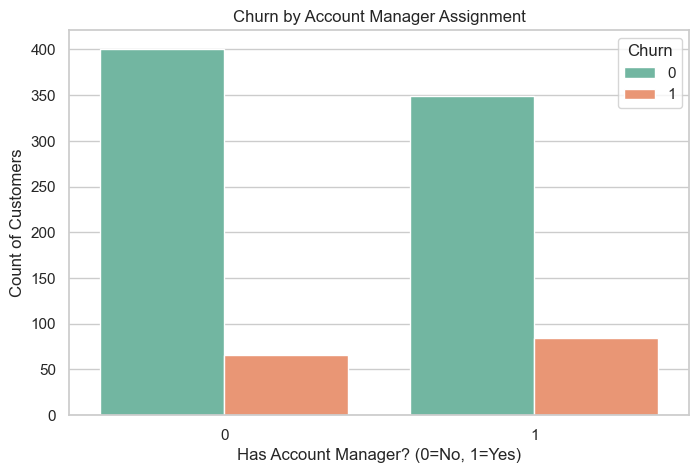

In [23]:
if 'Account_Manager' in df.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='Account_Manager', hue='Churn', data=df, palette='Set2')
    plt.title('Churn by Account Manager Assignment')
    plt.xlabel('Has Account Manager? (0=No, 1=Yes)')
    plt.ylabel('Count of Customers')
    plt.legend(title='Churn')

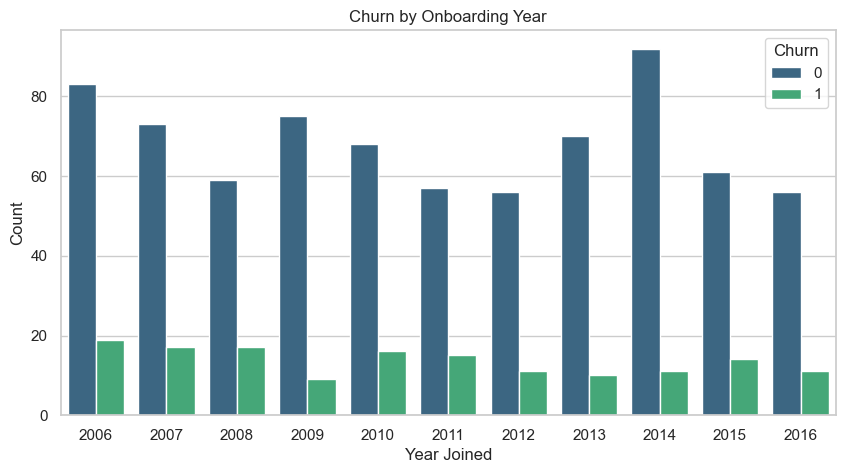

In [24]:
if 'Onboard_Year' in df.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x='Onboard_Year', hue='Churn', data=df, palette='viridis')
    plt.title('Churn by Onboarding Year')
    plt.xlabel('Year Joined')
    plt.ylabel('Count')
    plt.legend(title='Churn')

Text(0.5, 1.0, 'Feature Correlation Matrix')

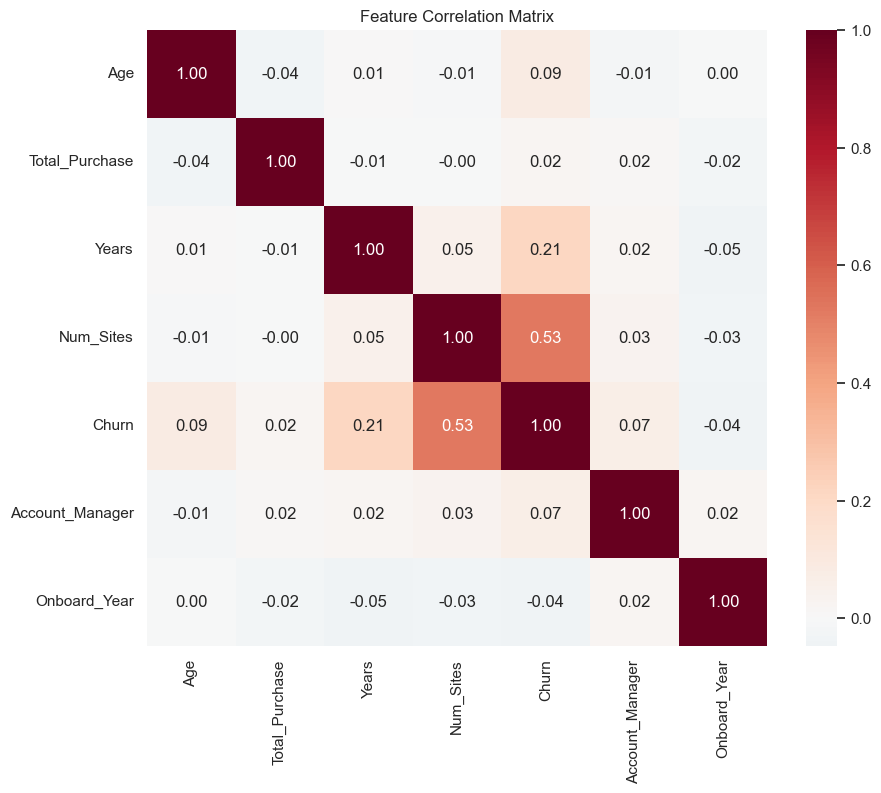

In [25]:
corr_cols = numerical_features + ['Churn', 'Account_Manager', 'Onboard_Year']
corr_cols = [c for c in corr_cols if c in df.columns]

plt.figure(figsize=(10, 8))
sns.heatmap(df[corr_cols].corr(), annot=True, cmap='RdBu_r', fmt=".2f", center=0)
plt.title('Feature Correlation Matrix')

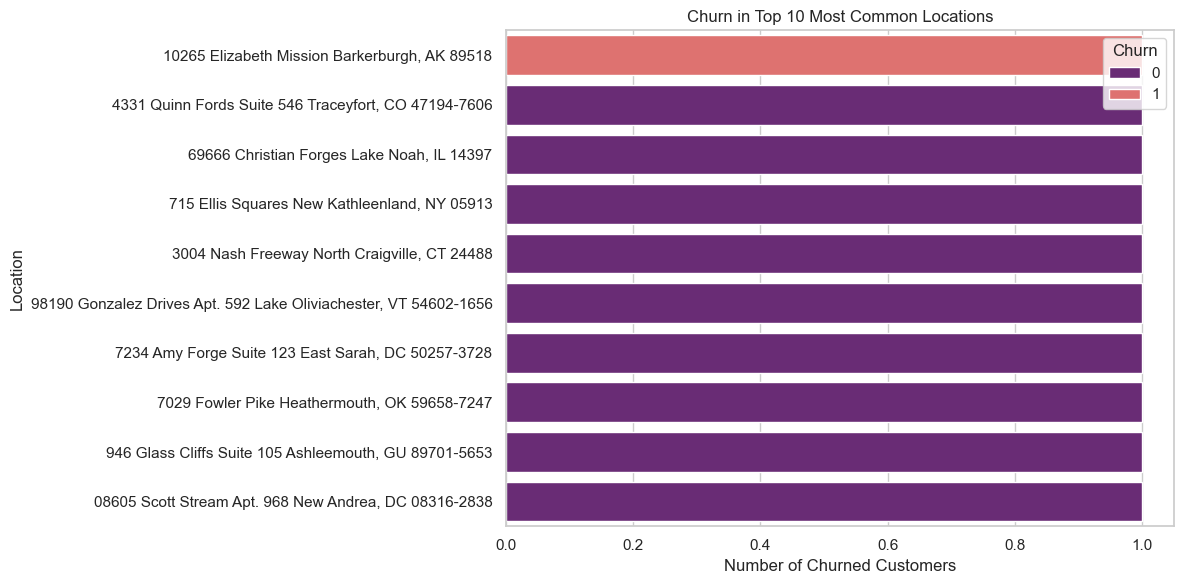

In [27]:
if 'Location' in df.columns:
    top_locations = df['Location'].value_counts().head(10).index
    subset = df[df['Location'].isin(top_locations)]
    
    plt.figure(figsize=(12, 6))
    sns.countplot(y='Location', hue='Churn', data=subset, palette='magma', order=top_locations)
    plt.title('Churn in Top 10 Most Common Locations')
    plt.xlabel('Number of Churned Customers')
    plt.ylabel('Location')
    plt.legend(title='Churn', loc='upper right')
    plt.tight_layout()
    plt.show()

In [28]:
df['Location'].value_counts().head(5)

Location
10265 Elizabeth Mission Barkerburgh, AK 89518           1
4331 Quinn Fords Suite 546 Traceyfort, CO 47194-7606    1
69666 Christian Forges Lake Noah, IL 14397              1
715 Ellis Squares New Kathleenland, NY 05913            1
3004 Nash Freeway North Craigville, CT 24488            1
Name: count, dtype: int64